In [ ]:
''' Do not change this cell '''
#Functions

def check_gpu():
  if tf.test.gpu_device_name() != '':
    print("GPU sucessfully connected")
  else: print("PLease connect GPU")

def check_data():
  a = set()
  for image in Images:
    a.add(Image.shape[2])
  if len(a)==1 and len(Images)==624:
    print("PASS")
  else: print("FAIL")

In [34]:
#Import any library here only.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import os
from random import shuffle

## <font color='orange'>Task #1</font>

Data loading and understanding data

In [8]:
#Setup and check a gpu connection.
! gdown --id 1lzKIwRAWG4jRoIOc4ezC9FED7LHW3qyv
! unzip OpenCodeData.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lzKIwRAWG4jRoIOc4ezC9FED7LHW3qyv
To: /content/OpenCodeData.zip
100% 77.7M/77.7M [00:01<00:00, 45.4MB/s]
Archive:  OpenCodeData.zip
   creating: OpenCodeData/OpenCodeData/
   creating: OpenCodeData/OpenCodeData/INFECTED/
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_11.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_12.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_13.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_6.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_7.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_8.jpeg  
  inflating: OpenCodeData/OpenCodeData/INFECTED/person1_virus_9.jpeg  
  inflating

In [11]:
''' Do not change this cell '''
check_gpu()

GPU sucessfully connected


In [35]:
#Create two lists, images and labels. Store Input images in 'Images' list and its labels in 'Labels' list.
#Infected Images have two categories viral and bacterial. Find Number of images in each class. (Hint: See image name)
#Note that images are of different sizes.

Images= []
Labels = []

os.chdir('/content/OpenCodeData/OpenCodeData')

IMG_DIM = (256,256)

# getting all the images from NORMAL directory
os.chdir('NORMAL')
normal_image_names = os.listdir()

normal_images = [cv.resize(cv.imread(image_name), IMG_DIM) for image_name in normal_image_names] # normal images
num_normal = len(normal_images) # number of normal images
normal_labels = ["normal" for i in range(num_normal)] # normal image labels

# getting all the images from INFECTED directory
os.chdir('../INFECTED')
infected_image_names = os.listdir()
shuffle(infected_image_names)

num_infected = len(infected_image_names) # number of infected images
infected_images = [cv.resize(cv.imread(image_name), IMG_DIM) for image_name in infected_image_names] # infected images
infected_labels = []

# getting labels for bacteria and virus
for img_name in infected_image_names:
  if(img_name.__contains__('bacteria')):
    infected_labels.append('bacteria')
  else:
    infected_labels.append('virus')

os.chdir('/content') #changing the directory back to home

bacteria_count = infected_labels.count("bacteria")
virus_count = num_infected - bacteria_count

# putting all the images in Images List
Images.extend(normal_images)
Images.extend( infected_images)

# putting all the images in Labels List
Labels.extend(normal_labels)
Labels.extend( infected_labels)

print(f"Number of Normal Images: {num_normal}")
print(f"Number of Bacterial Images: {bacteria_count}")
print(f"Number of Viral Images: {virus_count}")

Number of Normal Images: 234
Number of Bacterial Images: 242
Number of Viral Images: 148


In [ ]:
''' Do not change this cell '''
check_data()

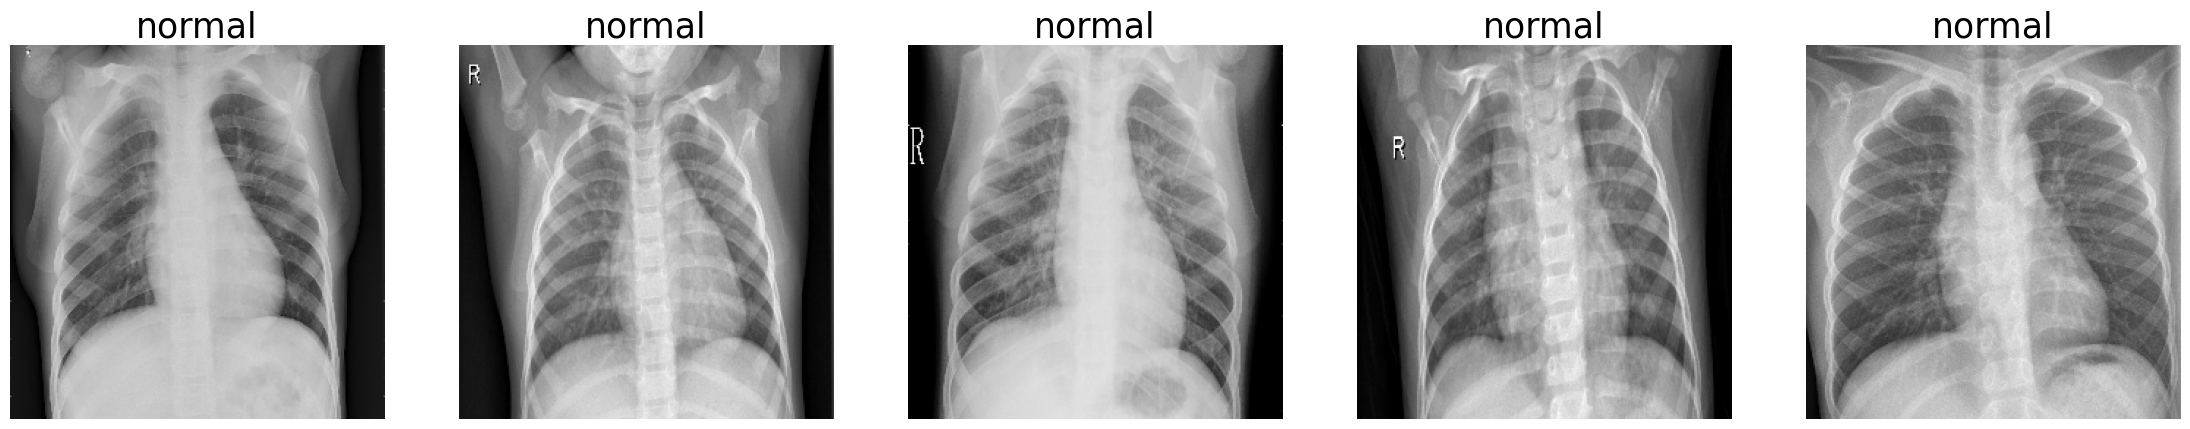

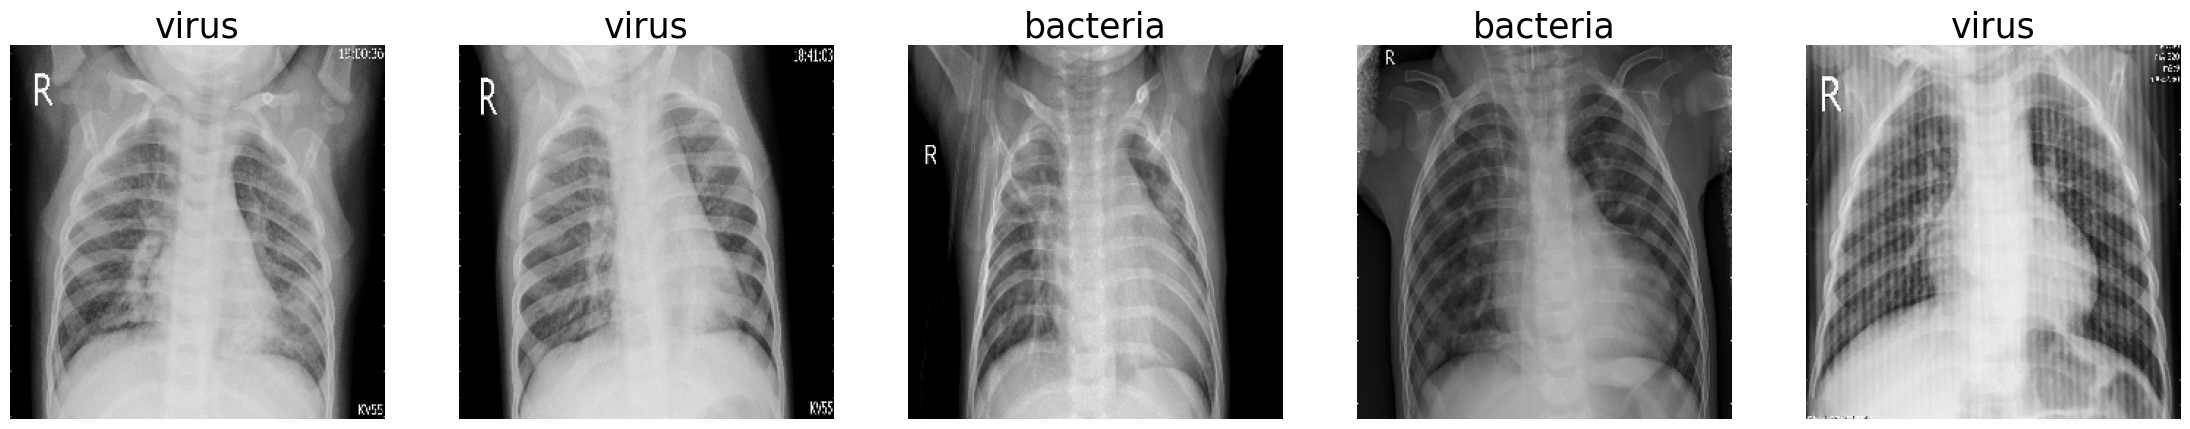

In [53]:
#Plot 5 images each of normal and infected category.
#Also do neccessary labelings. Make sure your plots have all necessary details and looks good :)
#You can customise your plots as per your wish.

fig1, ax1 = plt.subplots(ncols =5, figsize=(28,28))
for  i, img in enumerate(normal_images[:5]):
    ax1[i].imshow(img.astype(int), cmap = 'gray')
    ax1[i].title.set_text("normal")
    ax1[i].title.set_size(25)
    ax1[i].axis('off')

fig2, ax2 = plt.subplots(ncols = 5, figsize = (28, 28))
for i, img in enumerate(infected_images[:5]):
    ax2[i].imshow(img.astype(int), cmap = 'gray')
    ax2[i].title.set_text(infected_labels[i])
    ax2[i].title.set_size(25)
    ax2[i].axis('off')